In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("data/SAML-D.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


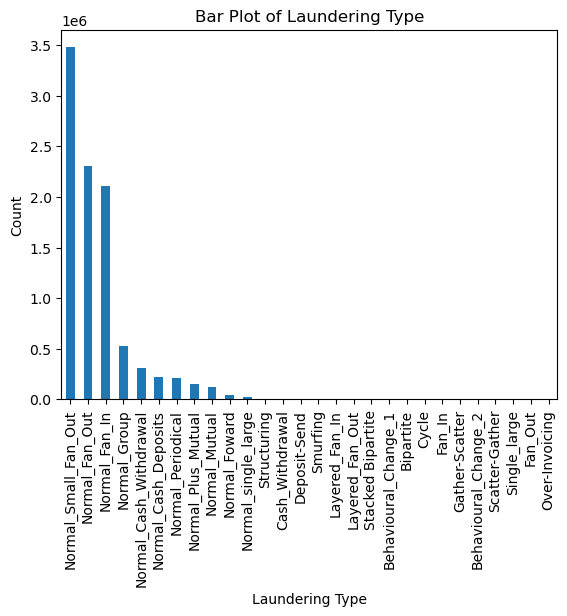

In [4]:
data["Laundering_type"].value_counts().plot(kind="bar")

plt.xlabel("Laundering Type")
plt.ylabel("Count")
plt.title("Bar Plot of Laundering Type")
plt.show()

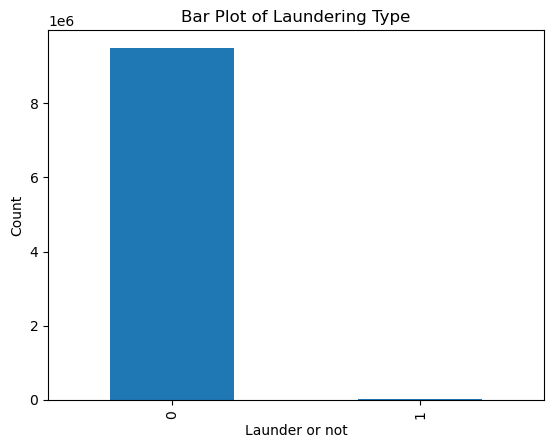

In [5]:
data["Is_laundering"].value_counts().plot(kind="bar")

plt.xlabel("Launder or not")
plt.ylabel("Count")
plt.title("Bar Plot of Laundering Type")
plt.show()

## Since the target variable is very skewed, we need to use the stratified split.

In [6]:
train_and_validation_data, test_data = train_test_split(
    data,
    test_size=0.1,        
    stratify=data["Is_laundering"], 
    random_state=42
)
train_data, validation_data = train_test_split(
    train_and_validation_data,
    test_size=1/9,        
    stratify=train_and_validation_data["Is_laundering"], 
    random_state=42
)

In [7]:
train_data.to_csv("train.csv", index=False)
validation_data.to_csv("val.csv", index=False)
test_data.to_csv("test.csv", index=False)

### Check missing values

In [8]:
train_data.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

### Check duplicates

In [9]:
train_data.duplicated().sum()

np.int64(0)

In [10]:
num_cols = train_data.select_dtypes(include = ["int64", "float64"]).columns.tolist()
num_cols

['Sender_account', 'Receiver_account', 'Amount', 'Is_laundering']

In [11]:
train_data.Amount.info()

<class 'pandas.core.series.Series'>
Index: 7603880 entries, 7990301 to 2434029
Series name: Amount
Non-Null Count    Dtype  
--------------    -----  
7603880 non-null  float64
dtypes: float64(1)
memory usage: 116.0 MB


In [13]:
train_data.Amount.describe()

count    7.603880e+06
mean     8.769890e+03
std      2.577267e+04
min      3.730000e+00
25%      2.144960e+03
50%      6.115330e+03
75%      1.045846e+04
max      1.261850e+07
Name: Amount, dtype: float64

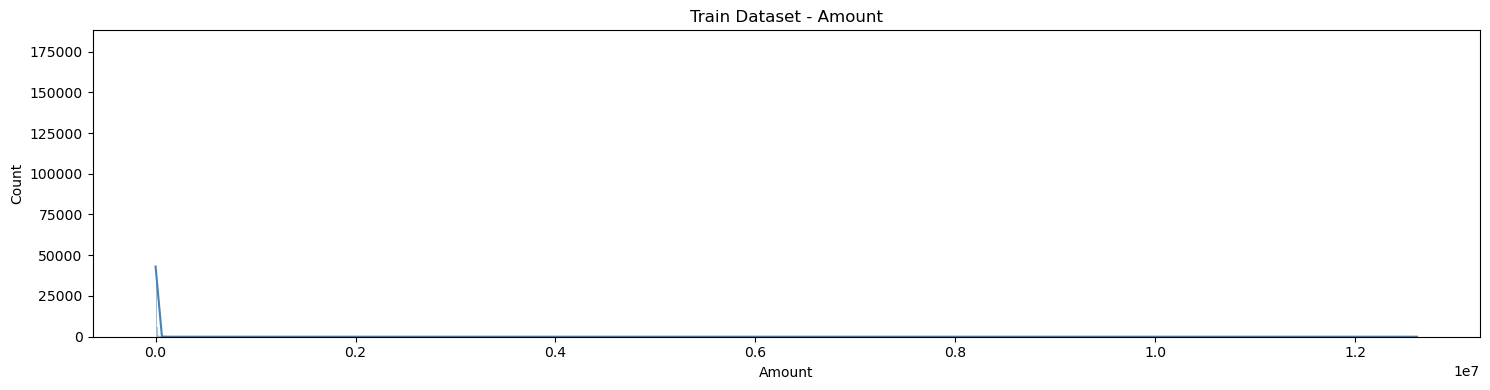

In [14]:
fig, axis = plt.subplots(1, 1, figsize = (15,4))
sns.histplot(train_data["Amount"], kde = True, ax = axis, color = "steelblue")
axis.set_title(f"Train Dataset - {"Amount"}")

plt.tight_layout()
plt.show()


In [ ]:
transactions_per_payment_type = train_data['Payment_type'].value_counts()

# number of laundering transactions per payment type
laundering_transactions_per_payment_type = train_data[train_data['Is_laundering'] == 1].groupby('Payment_type').size()

laundering_transactions_percentage_per_payment_type = laundering_transactions_per_payment_type/

transactions_per_payment_type, laundering_transactions_per_payment_type

(Payment_type
 Debit card         1610286
 Credit card        1609797
 Cheque             1609196
 ACH                1607236
 Cross-border        747173
 Cash Withdrawal     240129
 Cash Deposit        180063
 Name: count, dtype: int64,
 Payment_type
 ACH                 930
 Cash Deposit       1136
 Cash Withdrawal    1037
 Cheque              876
 Credit card         895
 Cross-border       2131
 Debit card          894
 dtype: int64)

In [16]:
laundering_stats = train_data[train_data['Is_laundering'] == 1]['Amount'].agg(['max', 'mean', 'min'])

normal_stats = train_data[train_data['Is_laundering'] == 0]['Amount'].agg(['max', 'mean', 'min'])

print("Laundering Transactions Stats:\n", laundering_stats)
print("\nNormal Transactions Stats:\n", normal_stats)

Laundering Transactions Stats:
 max     1.261850e+07
mean    4.061914e+04
min     1.622000e+01
Name: Amount, dtype: float64

Normal Transactions Stats:
 max     999962.190000
mean      8736.769896
min          3.730000
Name: Amount, dtype: float64


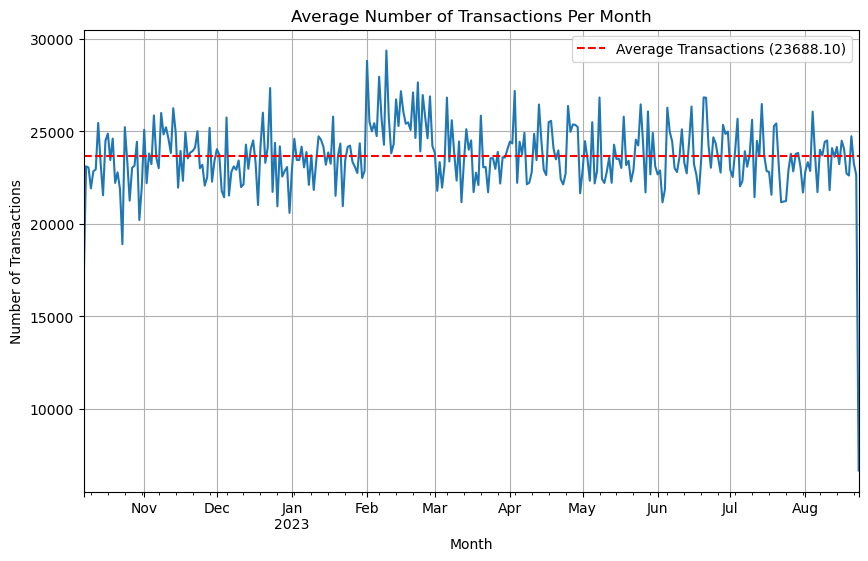

In [25]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
monthly_transactions = train_data.groupby(train_data['Date'].dt.to_period('D')).size()

# number of transactions per month
average_monthly_transactions = monthly_transactions.mean()



plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.axhline(y=average_monthly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_transactions:.2f})')
#plt.axhline(y=average_monthly_launderings, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_launderings:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Average Number of Transactions Per Month')
plt.legend()
plt.grid(True)
plt.show()

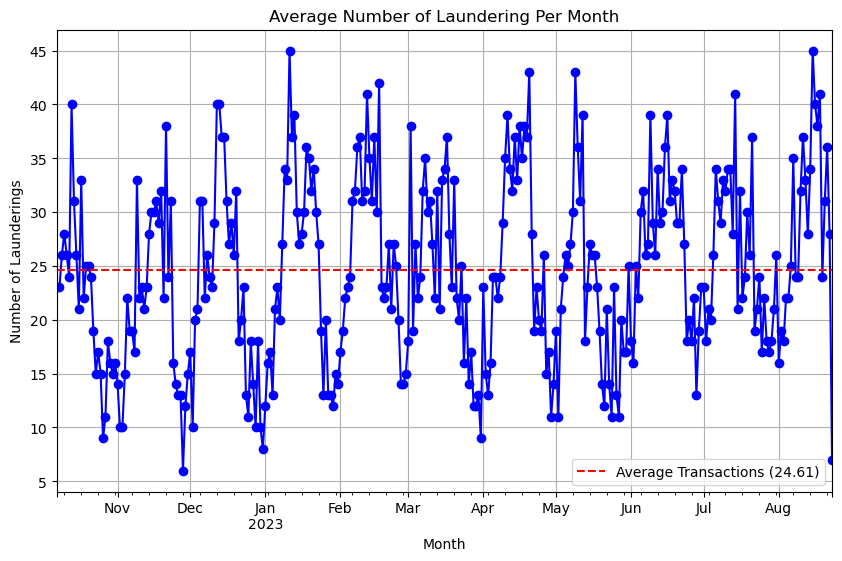

In [28]:
# number of transactions per month
monthly_launderings = train_data[train_data['Is_laundering'] == 1].groupby(train_data['Date'].dt.to_period('D')).size()
average_monthly_launderings = monthly_launderings.mean()
plt.figure(figsize=(10, 6))

# Plot line on this figure
ax = monthly_launderings.plot(kind='line', color='blue', marker='o')

# Add horizontal line for average
ax.axhline(y=average_monthly_launderings, color='r', linestyle='--',
           label=f'Average Transactions ({average_monthly_launderings:.2f})')

# Labels, title, legend, grid
ax.set_xlabel('Month')
ax.set_ylabel('Number of Launderings')
ax.set_title('Average Number of Laundering Per Month')
ax.legend()
ax.grid(True)

plt.show()


Laundering percentage against amounts

C:\Users\smile\AppData\Local\Temp\ipykernel_10792\2288086961.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = train_data.groupby("Amount_bin").size()
C:\Users\smile\AppData\Local\Temp\ipykernel_10792\2288086961.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  laundering_counts = train_data[train_data["Is_laundering"] == 1].groupby("Amount_bin").size()
C:\Users\smile\AppData\Local\Temp\ipykernel_10792\2288086961.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

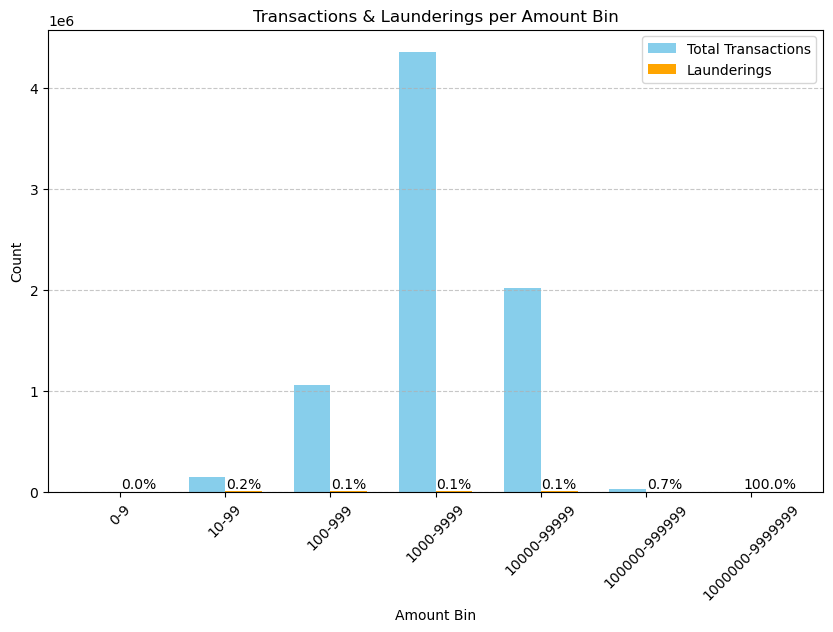

In [31]:
bins = [0,10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7]
labels = ["0-9", "10-99", "100-999", "1000-9999", "10000-99999", "100000-999999", "1000000-9999999"]
train_data["Amount_bin"] = pd.cut(train_data["Amount"], bins=bins, labels=labels, right=False)

# Count total transactions and laundering per bin
total_counts = train_data.groupby("Amount_bin").size()
laundering_counts = train_data[train_data["Is_laundering"] == 1].groupby("Amount_bin").size()
laundering_counts = laundering_counts.reindex(total_counts.index, fill_value=0)

# Compute percentage of laundering
percent_laundering = laundering_counts / total_counts * 100

# Plot grouped bar plot
width = 0.35
x = range(len(total_counts))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, total_counts, width, label="Total Transactions", color="skyblue")
ax.bar([i + width for i in x], laundering_counts, width, label="Launderings", color="orange")

# Add percentages on top of laundering bars
for i, pct in enumerate(percent_laundering):
    ax.text(i + width, laundering_counts[i] + 0.5, f"{pct:.1f}%", ha="center", va="bottom")

# Formatting
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(total_counts.index)
ax.set_xlabel("Amount Bin")
ax.set_ylabel("Count")
ax.set_title("Transactions & Launderings per Amount Bin")
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### Laundering percentage for different currencies

C:\Users\smile\AppData\Local\Temp\ipykernel_10792\246833780.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + width, laundering_counts[i] + 0.5, f"{pct:.1f}%", ha="center", va="bottom")


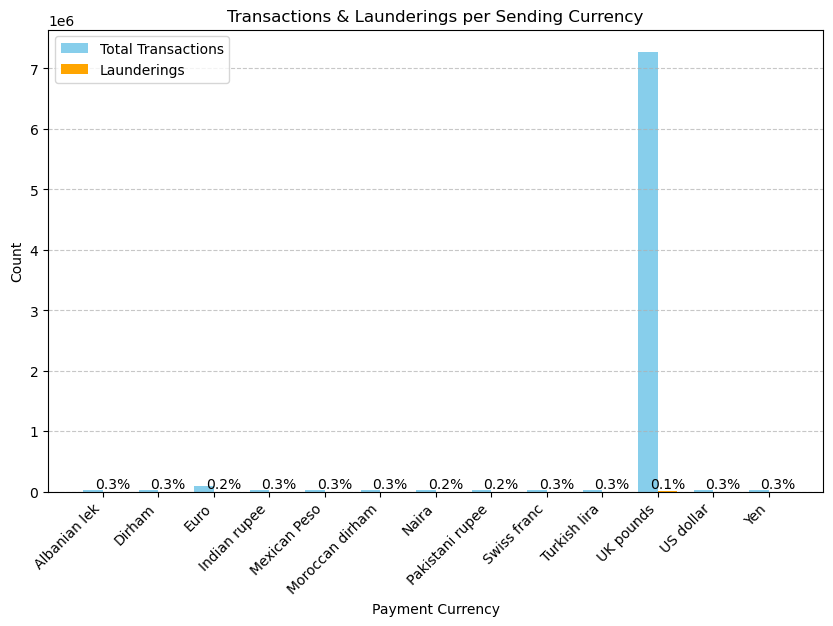

In [ ]:
total_counts = train_data.groupby("Payment_currency").size()

# Count laundering transactions per currency
laundering_counts = train_data[train_data["Is_laundering"] == 1].groupby("Payment_currency").size()

# Make sure all currencies align
laundering_counts = laundering_counts.reindex(total_counts.index, fill_value=0)

# Compute percentage of laundering
percent_laundering = laundering_counts / total_counts * 100

# Plot grouped bar plot
width = 0.35
x = range(len(total_counts))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, total_counts, width, label="Total Transactions", color="skyblue")
ax.bar([i + width for i in x], laundering_counts, width, label="Launderings", color="orange")

# Add percentages on top of laundering bars
for i, pct in enumerate(percent_laundering):
    ax.text(i + width, laundering_counts[i] + 0.5, f"{pct:.1f}%", ha="center", va="bottom")

# Formatting
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(total_counts.index, rotation=45, ha="right")  # slanted labels
ax.set_xlabel("Payment Currency")
ax.set_ylabel("Count")
ax.set_title("Transactions & Launderings per Payment Currency")
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_10792\3190076611.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i + width, laundering_counts[i] + 0.5, f"{pct:.1f}%", ha="center", va="bottom")


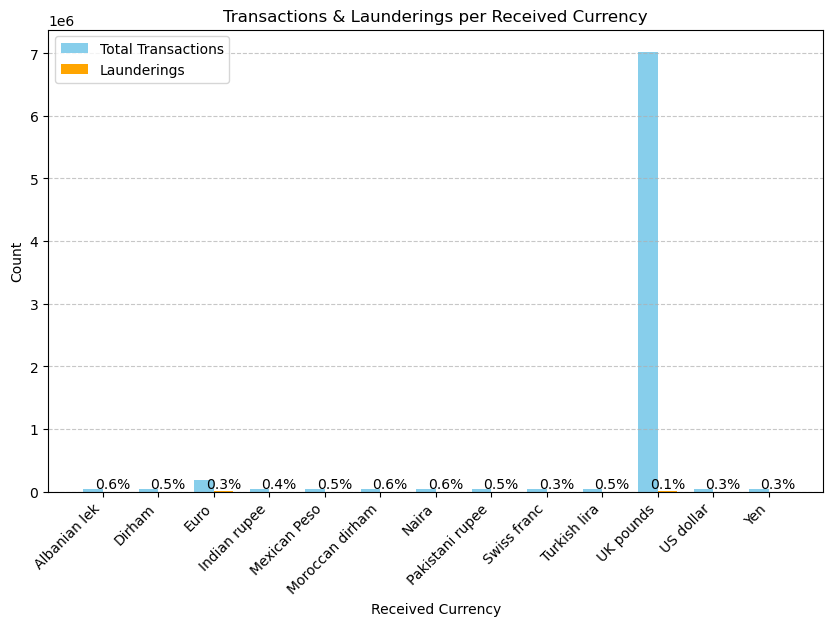

In [35]:
total_counts = train_data.groupby("Received_currency").size()

# Count laundering transactions per currency
laundering_counts = train_data[train_data["Is_laundering"] == 1].groupby("Received_currency").size()

# Make sure all currencies align
laundering_counts = laundering_counts.reindex(total_counts.index, fill_value=0)

# Compute percentage of laundering
percent_laundering = laundering_counts / total_counts * 100

# Plot grouped bar plot
width = 0.35
x = range(len(total_counts))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, total_counts, width, label="Total Transactions", color="skyblue")
ax.bar([i + width for i in x], laundering_counts, width, label="Launderings", color="orange")

# Add percentages on top of laundering bars
for i, pct in enumerate(percent_laundering):
    ax.text(i + width, laundering_counts[i] + 0.5, f"{pct:.1f}%", ha="center", va="bottom")

# Formatting
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(total_counts.index, rotation=45, ha="right")  # slanted labels
ax.set_xlabel("Received Currency")
ax.set_ylabel("Count")
ax.set_title("Transactions & Launderings per Received Currency")
ax.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()